In [1]:
# Keiana Dunn
# Neural Network - Backp propagation - Sigmoid Activation Function
# Data Analysis 
# 3/9/19
# Week 7 Objective: Locate the "best" values for weights and bias with the help of 
# back propagation. The NN uses a learning rate to learn how to  Create code takes 
# 5 feature values and computes two targets based on random values for all weights 
# and biases and gives the user the option of choosing either a RELU or a sigmoid 
# function. Computation of the targets is in its own Python function and accept the 
# five features and all weights and biases as input and are output of the targets.


In [1]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt

Definitions for Feedforward, Loss and Activation functions 

In [2]:
#Definitions for Feedforward and Loss 
def FF(features,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out):    
    neuron_value_layer2 = sigmoid((np.matmul(features, weights_in_hidden1))+ bias1.T)   
    #print('neuron_value_layer2R shape', neuron_value_layer2R.shape)
    #print('neuron_value_layer2R')
    #print(neuron_value_layer2R)
    #print('  ')
    neuron_value_layer3 = sigmoid((np.matmul(neuron_value_layer2, weights_in_hidden2))+ bias2.T)
    #print('neuron_value_layer3R')
    #print(neuron_value_layer3R)
    #print('  ')
    neuron_value_layer_output = sigmoid((np.matmul(neuron_value_layer3, weights_in_out))+ bias_out.T)
    #print('neuron_value_layer_outputR')
    #print(neuron_value_layer_outputR)
    #print('  ')  
    return neuron_value_layer_output

def loss(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out):    
    neuron_value_layer2 = sigmoid((np.matmul(features, weights_in_hidden1))+ bias1.T)   
    #print('neuron_value_layer2R shape', neuron_value_layer2R.shape)
    #print('neuron_value_layer2R')
    #print(neuron_value_layer2R)
    #print('  ')
    neuron_value_layer3 = sigmoid((np.matmul(neuron_value_layer2, weights_in_hidden2))+ bias2.T)
    #print('neuron_value_layer3R')
    #print(neuron_value_layer3R)
    #print('  ')
    neuron_value_layer_output = relu((np.matmul(neuron_value_layer3, weights_in_out))+ bias_out.T)
    #print('neuron_value_layer_outputR')
    #print(neuron_value_layer_outputR)
    #print('  ')  
    return np.sum((targets_observed-neuron_value_layer_output)**2)

#====================================================

# Define Sigmoid and ReLU activation target function

# Rectified Linear Unit (ReLU) used there is a matrix-vector product
def relu(x):
    return np.maximum(x,0)


# Calculate Sigmoid to get output values in a range of 0 to 1
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
 
#=====================================================

In [3]:
# Network size
N_input = 5
N_hidden1 = 4
N_hidden2 = 3
N_output = 2

# Allows the same numbers to appear every time even when the values are reset
np.random.seed(51)

# Weights and Bias Initialization - first guess

# Calculate the input to the hidden layer 1 by multiplying neuron weights in hidden layer 1 by neuron weights in input 
weights_in_hidden1 = np.random.rand(N_input,N_hidden1)
# Calculate bias 1 of hidden layer 1
bias1 = np.random.rand(N_hidden1,1)

# Calculate the hidden layer 1 to the hidden layer 2 by multiplying neuron weights in hidden layer 2 by neuron weights in hidden layer 1  
weights_in_hidden2 = np.random.rand(N_hidden1,N_hidden2)
# Calculate bias 2 of hidden layer 2 
bias2 = np.random.rand(N_hidden2,1)

# Calculate the hidden layer 2 to the output layer by multiplying neuron weights from output by neuron weights in hidden layer 2
weights_in_out = np.random.rand(N_hidden2,N_output)
# Calculate the bias to output of the network
bias_out = np.random.rand(N_output,1)

## Set up training data
## Each row is a case
## Columns 0-4 are features
## Columns 5 & 6 are targets

features_and_targets = np.array( 
                                   [ [0, 0, 0, 0, 0, 0, 1],
                                     [0, 0, 0, 0, 1, 0, 1],
                                     [0, 0, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 1, 1, 0, 1],
                                     [0, 1, 1, 1, 1, 0, 1],
                                     [1, 1, 1, 1, 0, 0, 1],
                                     [1, 1, 1, 0, 0, 0, 1],
                                     [1, 1, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 1, 0, 0, 1],
                                     [1, 0, 1, 1, 0, 0, 1],
                                     [1, 1, 0, 1, 0, 0, 1],
                                     [0, 1, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 0, 1, 0, 1],
                                     [1, 0, 1, 1, 1, 1, 0],
                                     [1, 1, 0, 1, 1, 1, 0],
                                     [1, 0, 1, 0, 1, 1, 0],
                                     [1, 0, 0, 0, 1, 1, 0],
                                     [1, 1, 0, 0, 1, 1, 0],
                                     [1, 1, 1, 0, 1, 1, 0],
                                     [1, 1, 1, 1, 1, 1, 0],
                                     [1, 0, 0, 1, 1, 1, 0]  ]
                           , dtype=float)

# shuffle our cases
#np.random.shuffle(features_and_targets)
learning_rate = 0.001
number_of_epochs = 800 #For NN epochs is equivalent to interations

# To produce a function to compute the slope 
dloss_by_dw1 = grad(loss,2)
dloss_by_db1 = grad(loss,3)
dloss_by_dw2 = grad(loss,4)
dloss_by_db2 = grad(loss,5)
dloss_by_dw3 = grad(loss,6)
dloss_by_db3 = grad(loss,7)
#print(grad(loss,2))    
losses = []

for iteration in range(number_of_epochs):
    
    for i in range(22):
        # 22 feature observations 
        features = features_and_targets[i,0:5]
        # 22 target observations
        targets_observed = features_and_targets[i,5:7]
    
        #print( FF(features,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out) )
        
        # The assignment operator, -=, subtracts the variable to the left from the equation on right    
        weights_in_hidden1 -= learning_rate * dloss_by_dw1(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias1 -= learning_rate * dloss_by_db1(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        weights_in_hidden2 -= learning_rate * dloss_by_dw2(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias2 -= learning_rate * dloss_by_db2(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)        
        weights_in_out -= learning_rate * dloss_by_dw3(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias_out -= learning_rate * dloss_by_db3(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        
        c=losses.append(loss(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out))
        #print(c)
        #print(loss(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out))
       


#plt.semilogy(losses)
#plt.show()
#plt.text(0,.05,'text')

for i in range(22):
    features = features_and_targets[i,0:5]
    # 22 target observations
    targets_observed = features_and_targets[i,5:7]    
    print( targets_observed, FF(features,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out) )

[0. 1.] [[0.5919997  0.64771128]]
[0. 1.] [[0.59293198 0.64825126]]
[0. 1.] [[0.59382194 0.64900177]]
[0. 1.] [[0.59473529 0.6495035 ]]
[0. 1.] [[0.59557906 0.6498291 ]]
[0. 1.] [[0.59573066 0.65005071]]
[0. 1.] [[0.5953397 0.6496904]]
[0. 1.] [[0.59464396 0.64920063]]
[0. 1.] [[0.59307164 0.64876367]]
[0. 1.] [[0.59394521 0.64937969]]
[0. 1.] [[0.59485325 0.64977862]]
[0. 1.] [[0.59521594 0.64972687]]
[0. 1.] [[0.59504098 0.64941757]]
[0. 1.] [[0.59410971 0.64897033]]
[1. 0.] [[0.59530145 0.64999907]]
[1. 0.] [[0.59559345 0.64997704]]
[1. 0.] [[0.59482623 0.64965832]]
[1. 0.] [[0.59388165 0.64917362]]
[1. 0.] [[0.59515074 0.64956705]]
[1. 0.] [[0.59569659 0.64995916]]
[1. 0.] [[0.59599392 0.65023351]]
[1. 0.] [[0.59457804 0.64967065]]


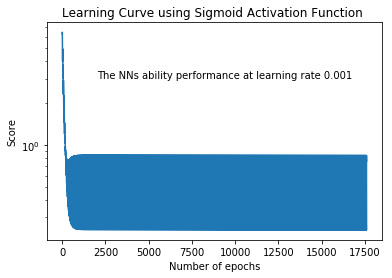

In [5]:
plt.semilogy(losses) # make a plot with log scale on the y axis
plt.text(2000,3,'The NNs ability performance at learning rate 0.001') # Add text on plot
plt.xlabel('Number of epochs') # Add label name
plt.title('Learning Curve using Sigmoid Activation Function ') # Add title name
plt.ylabel('Score') # Add label name
plt.show() # Plot graph

In [6]:
plt.savefig('lr001.png')# Save figure

<Figure size 432x288 with 0 Axes>

At a learning rate of 0.001, the performance of the network shows it was able to learn quickly by the initial steep decline 
in the curve but it reached a limit in its ability to become efficient.

Rerun alorithm with new learning rate and additional epochs

In [7]:
# Network size
N_input = 5
N_hidden1 = 4
N_hidden2 = 3
N_output = 2

# Allows the same numbers to appear every time even when the values are reset
np.random.seed(51)

# Weights and Bias Initialization - first guess

# Calculate the input to the hidden layer 1 by multiplying neuron weights in hidden layer 1 by neuron weights in input 
weights_in_hidden1 = np.random.rand(N_input,N_hidden1)
# Calculate bias 1 of hidden layer 1
bias1 = np.random.rand(N_hidden1,1)

# Calculate the hidden layer 1 to the hidden layer 2 by multiplying neuron weights in hidden layer 2 by neuron weights in hidden layer 1  
weights_in_hidden2 = np.random.rand(N_hidden1,N_hidden2)
# Calculate bias 2 of hidden layer 2 
bias2 = np.random.rand(N_hidden2,1)

# Calculate the hidden layer 2 to the output layer by multiplying neuron weights from output by neuron weights in hidden layer 2
weights_in_out = np.random.rand(N_hidden2,N_output)
# Calculate the bias to output of the network
bias_out = np.random.rand(N_output,1)

## Set up training data
## Each row is a case
## Columns 0-4 are features
## Columns 5 & 6 are targets

features_and_targets = np.array( 
                                   [ [0, 0, 0, 0, 0, 0, 1],
                                     [0, 0, 0, 0, 1, 0, 1],
                                     [0, 0, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 1, 1, 0, 1],
                                     [0, 1, 1, 1, 1, 0, 1],
                                     [1, 1, 1, 1, 0, 0, 1],
                                     [1, 1, 1, 0, 0, 0, 1],
                                     [1, 1, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 0, 0, 0, 1],
                                     [1, 0, 0, 1, 0, 0, 1],
                                     [1, 0, 1, 1, 0, 0, 1],
                                     [1, 1, 0, 1, 0, 0, 1],
                                     [0, 1, 0, 1, 1, 0, 1],
                                     [0, 0, 1, 0, 1, 0, 1],
                                     [1, 0, 1, 1, 1, 1, 0],
                                     [1, 1, 0, 1, 1, 1, 0],
                                     [1, 0, 1, 0, 1, 1, 0],
                                     [1, 0, 0, 0, 1, 1, 0],
                                     [1, 1, 0, 0, 1, 1, 0],
                                     [1, 1, 1, 0, 1, 1, 0],
                                     [1, 1, 1, 1, 1, 1, 0],
                                     [1, 0, 0, 1, 1, 1, 0]  ]
                           , dtype=float)

# shuffle our cases
#np.random.shuffle(features_and_targets)
learning_rate = 0.0001
number_of_epochs = 2000 #For NN epochs is equivalent to interations

# To produce a function to compute the slope 
dloss_by_dw1 = grad(loss,2)
dloss_by_db1 = grad(loss,3)
dloss_by_dw2 = grad(loss,4)
dloss_by_db2 = grad(loss,5)
dloss_by_dw3 = grad(loss,6)
dloss_by_db3 = grad(loss,7)
#print(grad(loss,2))    
losses = []

for iteration in range(number_of_epochs):
    
    for i in range(22):
        # 22 feature observations 
        features = features_and_targets[i,0:5]
        # 22 target observations
        targets_observed = features_and_targets[i,5:7]
    
        #print( FF(features,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out) )
        
        # The assignment operator, -=, subtracts the variable to the left from the equation on right    
        weights_in_hidden1 -= learning_rate * dloss_by_dw1(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias1 -= learning_rate * dloss_by_db1(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        weights_in_hidden2 -= learning_rate * dloss_by_dw2(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias2 -= learning_rate * dloss_by_db2(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)        
        weights_in_out -= learning_rate * dloss_by_dw3(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        bias_out -= learning_rate * dloss_by_db3(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out)
        
        c=losses.append(loss(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out))
        #print(c)
        #print(loss(features,targets_observed,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out))

for i in range(22):
    features = features_and_targets[i,0:5]
    # 22 target observations
    targets_observed = features_and_targets[i,5:7]    
    print( targets_observed, FF(features,weights_in_hidden1,bias1,weights_in_hidden2,bias2,weights_in_out,bias_out) )

[0. 1.] [[0.58924933 0.65037   ]]
[0. 1.] [[0.58979394 0.65126496]]
[0. 1.] [[0.59033579 0.65233553]]
[0. 1.] [[0.59095944 0.65310051]]
[0. 1.] [[0.59154486 0.65365658]]
[0. 1.] [[0.59160339 0.65396254]]
[0. 1.] [[0.59137211 0.65345888]]
[0. 1.] [[0.59090506 0.65276264]]
[0. 1.] [[0.58975072 0.65194654]]
[0. 1.] [[0.59031307 0.65284793]]
[0. 1.] [[0.59096324 0.65347986]]
[0. 1.] [[0.59125183 0.65349235]]
[0. 1.] [[0.5911968 0.6530735]]
[0. 1.] [[0.59058006 0.65234318]]
[1. 0.] [[0.59125541 0.65383765]]
[1. 0.] [[0.59148522 0.65387078]]
[1. 0.] [[0.59094497 0.65334765]]
[1. 0.] [[0.59027289 0.65261522]]
[1. 0.] [[0.59120878 0.65331134]]
[1. 0.] [[0.59157965 0.65386114]]
[1. 0.] [[0.5917607  0.65423944]]
[1. 0.] [[0.5907337  0.65332701]]


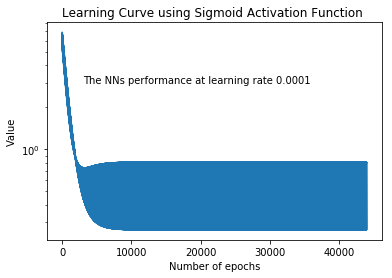

In [8]:
plt.semilogy(losses) # make a plot with log scale on the y axis
plt.text(3000,3,'The NNs performance at learning rate 0.0001  ') # Add text on plot
plt.xlabel('Number of epochs') # Add label name
plt.title('Learning Curve using Sigmoid Activation Function ') # Add title name
plt.ylabel('Value') # Add label name
plt.show() # Plot graph
#plt.savefig('lr0001.png') # Save figure

With a slower learning rate of 0.0001 and double iterations, the network was still not able to improve its efficiency 
with sigmoid activation. There was no significant change in the observed output weight values with changing the learning rate. The output weights vales were similar with both learning rates.